# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [188]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [42]:
df = pd.read_csv('data/human_body_temperature.csv')
np.random.seed(42)

In [184]:
%matplotlib inline

QUICK VIEW OF THE DATA

In [7]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


USEFUL FUNCTIONS

In [14]:
def ecdf(data):
    """Empirical Cumulative Distribution Function"""
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y

In [48]:
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1d data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

In [66]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates"""

    #initialize empty array of replicates 
    bs_replicates = np.empty(shape=size)
    
    #Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)
    
    return bs_replicates

In [51]:
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""
    
    #The difference of means
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

In [58]:
def sem(data):
    """Standard Error of the Mean"""
    return np.std(data)/np.sqrt(len(data))

1.) Is the distribution of body temperatures normal?

In [16]:
bin_temps = int(np.sqrt(len(df['temperature'])))
b_temp = df['temperature']

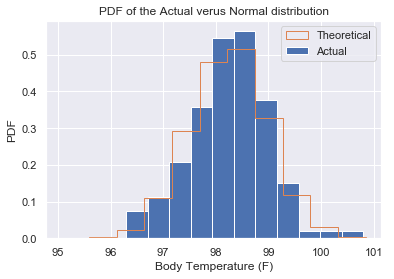

The mean of the data is 98.24923076923078 with a standard deviation of 0.7303577789050377.
The mean of the sample is 98.25238797960755 with a standard deviation of 0.732165321434236.


In [105]:
mean = np.mean(b_temp)
std = np.std(b_temp)
samples = np.random.normal(mean, std, size=10000)
sample_mean = np.mean(samples)
sample_std = np.std(samples)
x, y = ecdf(b_temp)
x_theor, y_theor = ecdf(samples)

_ = plt.hist(b_temp, bins=bin_temps, density=True)
_ = plt.hist(x_theor, bins=bin_temps, density=True, histtype='step')
_ = plt.xlabel('Body Temperature (F)')
_ = plt.ylabel('PDF')
_ = plt.legend(['Theoretical', 'Actual'])
_ = plt.title('PDF of the Actual verus Normal distribution')

plt.show()

print(f'The mean of the data is {mean} with a standard deviation of {std}.')
print(f'The mean of the sample is {sample_mean} with a standard deviation of {sample_std}.')

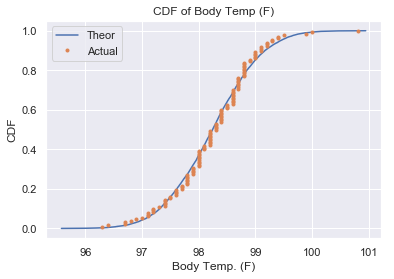

In [47]:
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Body Temp. (F)')
_ = plt.ylabel('CDF')
_ = plt.legend(['Theor', 'Actual'])
_ = plt.title('CDF of Body Temp (F)')

plt.show()

The distribution of Body temperature does seem normal, and the sample size is larger than 30.

2.) Is the sample size large, and is it independent?

By rule of thumb and assuming the samples are random, the sample size is greater than or equal to 30 which assumes it is approximately normally distributed.  The sample size is also less than 10% of the human population.

3.) Is the true population mean really 98.6 degrees F?

Bootstrap hypothesis test of the mean

In [74]:
#1 bootstrap replicate
bootstrap_replicate_1d(b_temp, np.mean)

98.15538461538462

In [103]:
#Draw 10000 bootstrap replicates for mean body temp
bs_replicates = draw_bs_reps(b_temp, np.mean, size=10000)
bs_sem = sem(b_temp)
bs_std = np.std(bs_replicates)
bs_mean = np.mean(bs_replicates)

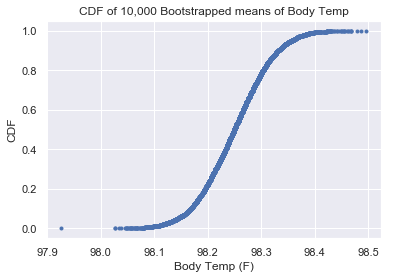

In [77]:
bs_x, bs_y = ecdf(bs_replicates)
_ = plt.plot(bs_x, bs_y, marker='.', linestyle='none')
_ = plt.xlabel('Body Temp (F)')
_ = plt.ylabel('CDF')
_ = plt.title('CDF of 10,000 Bootstrapped means of Body Temp')
plt.show()

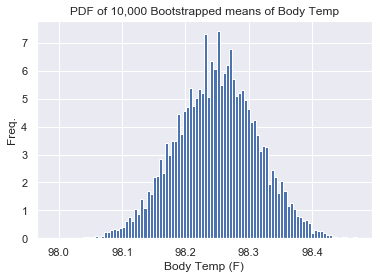

<Figure size 1440x1440 with 0 Axes>

The actual data had a SEM of 0.06405661469519336 and the bootstrapped data has STD of 0.06423119303770823 and a mean of 98.24880853846155.


In [191]:
_ = plt.hist(bs_replicates, bins=int(np.sqrt(10000)), density=True)
_ = plt.xlabel('Body Temp (F)')
_ = plt.ylabel('Freq.')
_ = plt.title('PDF of 10,000 Bootstrapped means of Body Temp')
_ = plt.figure(figsize=(20, 20))

plt.show()

print(f'The actual data had a SEM of {bs_sem} and the bootstrapped data has STD of {bs_std} and a mean of {bs_mean}.')

Frequentist Test using one sample.

Use one sample because we onlny have data from the sample, and no data from the entire population.  We can test the if the population mean is really 98.6 degrees F.

Null Hypothesis: The true mean temp of the population and data is 98.6 degrees F

Alternative Hypothesis: The mean temp of the population is less than or equal to mean of the data 

In [96]:
#shifting the data using the supposed true mean body temp
translated_temp_data = b_temp - mean + 98.6

In [95]:
def diff_from_true(data, true_mean=98.6):
    return np.mean(data) - true_mean

In [98]:
diff_obs = diff_from_true(b_temp)
print(diff_obs)

-0.35076923076921673


In [99]:
bs_replicates_trans = draw_bs_reps(translated_temp_data, diff_from_true, 100000)

In [100]:
#p-value
p = np.sum(bs_replicates_trans <= diff_obs) / len(bs_replicates_trans)
print(p)

0.0


We get a p-value of 0, meaning the the probability of getting a mean temp less than or equal to the observed diff is so unlikely given the null hypothesis is true that we reject the null hypothesis.  In fact, in 100,000 trials we did not get a single result less than or equal to the observed differencce.

In this case we would use a t statistic because the true population standard deviation is unknown and the sample population is greater than or equal to 30.

The results of the bootstrap hypothesis showed that in 10,000 attepmts, the experiment did not even get close to a mean temp of 98.6 degrees F.

4.) Repeat tests using a sample size of 10

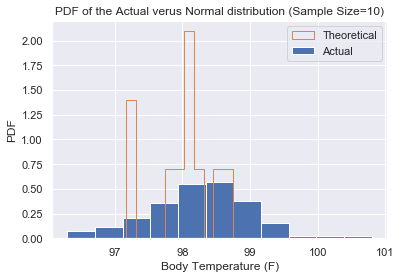

Sample Size 10: The mean of the data is 98.24923076923078 with a standard deviation of 0.7303577789050377.
Sample Size 10: The mean of the sample is 97.98177192663715 with a standard deviation of 0.47419114513983296.
Sample Size 10,000: The mean of the data is 98.24923076923078 with a standard deviation of 0.7303577789050377.
Sample Size 10,000:The mean of the sample is 98.25238797960755 with a standard deviation of 0.732165321434236.


In [150]:
mean = np.mean(b_temp)
std = np.std(b_temp)
samples_10 = np.random.normal(mean, std, size=10)
sample_mean_10 = np.mean(samples_10)
sample_std_10 = np.std(samples_10)
x, y = ecdf(b_temp)
x_theor_10, y_theor_10 = ecdf(samples_10)

_ = plt.hist(b_temp, bins=bin_temps, density=True)
_ = plt.hist(x_theor_10, bins=bin_temps, density=True, histtype='step')
_ = plt.xlabel('Body Temperature (F)')
_ = plt.ylabel('PDF')
_ = plt.legend(['Theoretical', 'Actual'])
_ = plt.title('PDF of the Actual verus Normal distribution (Sample Size=10)')

plt.show()

print(f'Sample Size 10: The mean of the data is {mean} with a standard deviation of {std}.')
print(f'Sample Size 10: The mean of the sample is {sample_mean_10} with a standard deviation of {sample_std_10}.')
print(f'Sample Size 10,000: The mean of the data is {mean} with a standard deviation of {std}.')
print(f'Sample Size 10,000:The mean of the sample is {sample_mean} with a standard deviation of {sample_std}.')

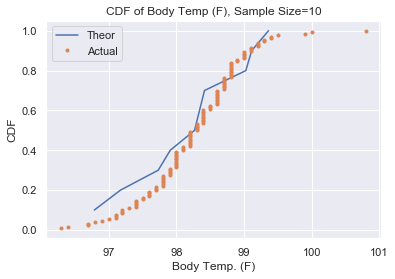

In [130]:
_ = plt.plot(x_theor_10, y_theor_10)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Body Temp. (F)')
_ = plt.ylabel('CDF')
_ = plt.legend(['Theor', 'Actual'])
_ = plt.title('CDF of Body Temp (F), Sample Size=10')

plt.show()

In [117]:
def bootstrap_replicate_1d_10(data, func):
    """Generate bootstrap replicate of 1d data."""
    bs_sample = np.random.choice(data, 10)
    return func(bs_sample)

In [118]:
def draw_bs_reps_10(data, func, size=1):
    """Draw bootstrap replicates"""

    #initialize empty array of replicates 
    bs_replicates = np.empty(shape=size)
    
    #Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d_10(data, func)
    
    return bs_replicates

In [142]:
#Draw 100000 bootstrap replicates for mean body temp
bs_replicates_10 = draw_bs_reps_10(b_temp, np.mean, size=100000)
bs_sem = sem(b_temp)
bs_std_10 = np.std(bs_replicates_10)
bs_mean_10 = np.mean(bs_replicates_10)

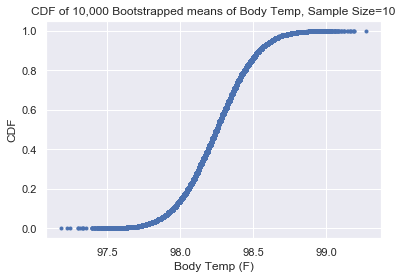

In [143]:
bs_x_10, bs_y_10 = ecdf(bs_replicates_10)
_ = plt.plot(bs_x_10, bs_y_10, marker='.', linestyle='none')
_ = plt.xlabel('Body Temp (F)')
_ = plt.ylabel('CDF')
_ = plt.title('CDF of 10,000 Bootstrapped means of Body Temp, Sample Size=10')
plt.show()

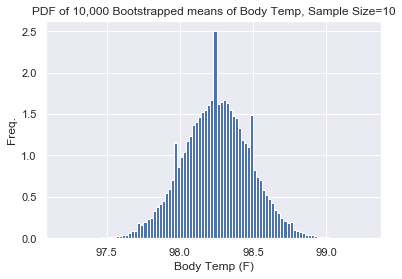

Sample Size 100,000: The actual data had a SEM of 0.06405661469519336 and the bootstrapped data has STD of 0.06423119303770823 and a mean of 98.24880853846155.
Sample Size 10: The actual data had a SEM of 0.06405661469519336 and the bootstrapped data has STD of 0.2311098255153811 and a mean of 98.24905050000001.


In [151]:
_ = plt.hist(bs_replicates_10, bins=int(np.sqrt(10000)), density=True)
_ = plt.xlabel('Body Temp (F)')
_ = plt.ylabel('Freq.')
_ = plt.title('PDF of 10,000 Bootstrapped means of Body Temp, Sample Size=10')
plt.show()

print(f'Sample Size 100,000: The actual data had a SEM of {bs_sem} and the bootstrapped data has STD of {bs_std} and a mean of {bs_mean}.')
print(f'Sample Size 10: The actual data had a SEM of {bs_sem} and the bootstrapped data has STD of {bs_std_10} and a mean of {bs_mean_10}.')

In [148]:
bs_replicates_trans_10 = draw_bs_reps_10(translated_temp_data, diff_from_true, 100000)

In [149]:
#p-value
p = np.sum(bs_replicates_trans_10 <= diff_obs) / len(bs_replicates_trans)
print(p)

0.06299


By reducing the sample size to 10, we get different results.  In the bootstrapping example the theoretical data does not look as normally distributed anymore, but the means and standard deviation are closer than in the one sample test with ten samples. The one sample test looks more normally distributed but has a higher standard deviation, with a similar mean.

In the one sample test, if we use a significance test with a significance values of 0.05 we can not reject the null hypothesis like when we had a higher sample size.

5.) What is considered abnormal body temperature?

In [164]:
conf_int = np.percentile(b_temp, [2.5, 97.5])
print(conf_int)

[96.7225 99.4775]


In [170]:
def bootstrap_replicate_1d_nofunc(data, size):
    """Generate bootstrap replicate of 1d data."""
    bs_sample = np.random.choice(data, size)
    return bs_sample

In [172]:
bs_reps_abnormal = bootstrap_replicate_1d_nofunc(b_temp, 10000)

In [173]:
abnorm_x, abnorm_y = ecdf(bs_reps_abnormal)

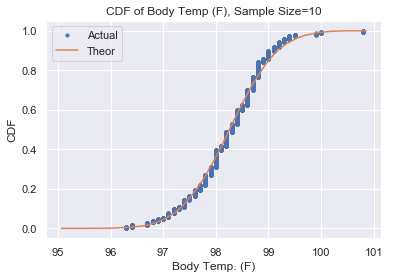

In [178]:
_ = plt.plot(abnorm_x, abnorm_y, marker='.', linestyle='none')
_ = plt.plot(x_theor, y_theor)
_ = plt.xlabel('Body Temp. (F)')
_ = plt.ylabel('CDF')
_ = plt.legend(['Actual', 'Theor'])
_ = plt.title('CDF of Body Temp (F), Sample Size=10')


plt.show()

In [180]:
bs_conf_int = np.percentile(bs_reps_abnormal, [2.5, 97.5])
print(bs_conf_int)

[96.7 99.5]


Using just the data given, the abnormal body temperature would be anything below 96.72 degrees F and anything above 99.48 degrees F.
Using the bootstrapped hypothesis test, the abnormal body temperature would be anything below 96.7 degrees F and anything above 99.5 degrees F.

6.) Is there a difference between males and females in normal temperature?

null hypothesis: males and females have the same mean body temperatures

Significance value of 0.05 will be used

In [157]:
female = df[df.gender == 'F']
male = df[df.gender == 'M']

In [158]:
female.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65 entries, 0 to 129
Data columns (total 3 columns):
temperature    65 non-null float64
gender         65 non-null object
heart_rate     65 non-null float64
dtypes: float64(2), object(1)
memory usage: 2.0+ KB


In [159]:
male.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65 entries, 2 to 128
Data columns (total 3 columns):
temperature    65 non-null float64
gender         65 non-null object
heart_rate     65 non-null float64
dtypes: float64(2), object(1)
memory usage: 2.0+ KB


In [161]:
male_temp = male['temperature']
female_temp = female['temperature']
male_mean = np.mean(male_temp)
male_std = np.std(male_temp)
female_mean = np.mean(female_temp)
female_std = np.std(female_temp)
mx, my = ecdf(male_temp)
fx, fy = ecdf(female_temp)

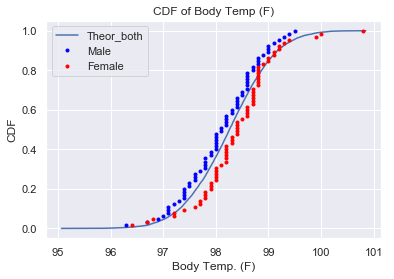

In [163]:
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(mx, my, marker='.', linestyle='none', color='blue')
_ = plt.plot(fx, fy, marker='.', linestyle='none', color='red')
_ = plt.xlabel('Body Temp. (F)')
_ = plt.ylabel('CDF')
_ = plt.legend(['Theor_both', 'Male', 'Female'])
_ = plt.title('CDF of Body Temp (F)')

plt.show()

In [192]:
#Shift arrays with the mean of the total sample
male_temp_shifted = male_temp - male_mean + mean
female_temp_shifted = female_temp - female_mean + mean

In [193]:
#draw 10,000 boot strap replicates of male and female body temperature
bs_reps_male = draw_bs_reps(male_temp_shifted, np.mean, size = 10000)
bs_reps_female = draw_bs_reps(female_temp_shifted, np.mean, size = 10000)

In [195]:
#difference of means of bs replicates
bs_reps_diff_means = bs_reps_female - bs_reps_male

In [196]:
#empirical difference of means
empirical_diff_means = female_mean - male_mean
print(empirical_diff_means)

0.289230769230727


In [197]:
#p-value
p_gender = np.sum(bs_reps_diff_means >= empirical_diff_means)/len(bs_reps_diff_means)
print(f'p-value: {p_gender}')

p-value: 0.0113


We can look at the CDF of male and female body temperatures and see that they have different body temperatures.  To verify that they do, a two-sample bootstrap hypothesis test for the difference of means was used.  A two-sample test was used because we have the data for both females and males.  We get a p-value less the significance value of 0.05.  This means we reject the null hypothesis, thus the mean body temps of males and females are not the same.